In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import trackbact as tb

c:\Users\mriza\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


# Load the data

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


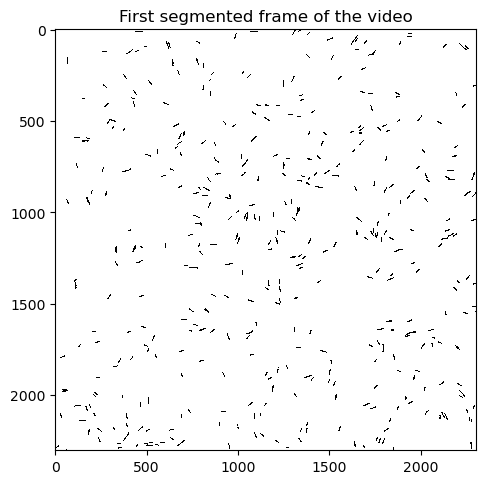

2304 2304


In [2]:
file_name="pilH_dense_mSc.tif"
im=tb.load_tif(file_name, show=True)
tifdim1=im.shape[1]
tifdim2=im.shape[2]
print(tifdim1, tifdim2)

# Fit ellipses to the contours

Finding the contours of the bacteria...: 100%|██████████| 200/200 [00:00<00:00, 249.79it/s]


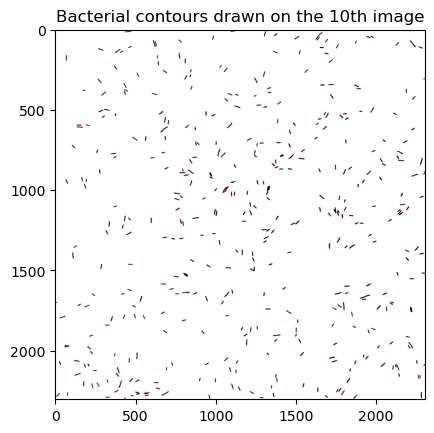

Fitting ellipses to the contours...: 100%|██████████| 200/200 [00:00<00:00, 286.88it/s]


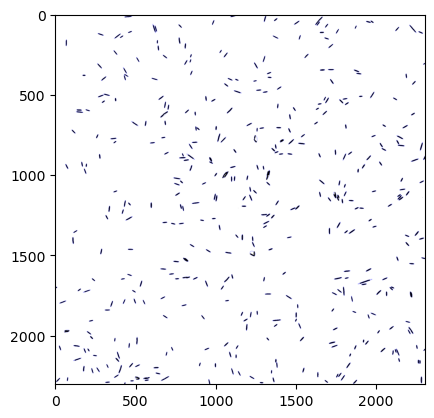

In [3]:
fitted_ellipses=tb.fit_ellipses(im, show_nth_frame=10, filter_max=(8,60))

# Format the data and plot the distribution of alignment angles

,x,y,frame,major_axis_size,minor_axis_size,body_angle
0,63.335365,2300.847656,0,13.432899,5.698264,47.701675
1,1852.221069,2297.835693,0,16.904724,5.823165,8.277697
2,1271.914307,2289.281006,0,24.360962,5.967599,82.002548
3,355.131378,2290.897705,0,29.223640,5.812747,77.162697
4,7.650183,2290.168213,0,39.926300,6.018880,52.164131
...,...,...,...,...,...,...
76769,2263.331055,6.550769,199,19.678921,4.981118,135.646927
76770,1670.389282,6.873578,199,33.062607,3.928048,57.323318
76771,1379.774292,6.470076,199,34.700546,4.631261,156.559418
76772,1097.357910,9.621296,199,26.105391,5.557971,8.183462


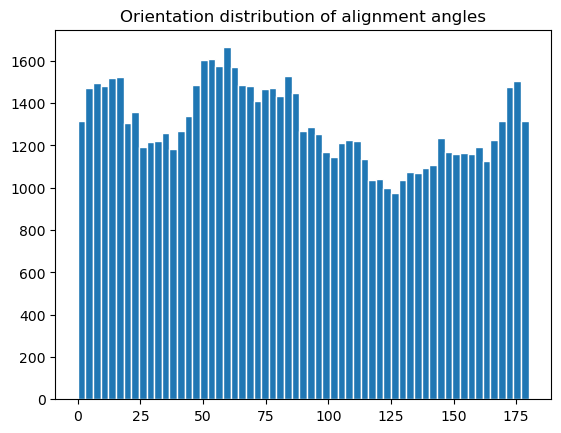

In [4]:
#format the fitted ellipses into a dataframe for tracking
ellipses_df=tb.format_ellipses(fitted_ellipses)
display(ellipses_df)

#For PIV analysis: Uncomment below to transform ellipses into single points
#tb.ellipse_to_particle(im, file_name, ellipses_df)


plt.hist(ellipses_df["body_angle"], bins=59, histtype='bar', ec='white')

#This is just a demo not final
plt.title("Orientation distribution of alignment angles")
plt.show()


In [5]:
import trackpy.diag
trackpy.diag.performance_report()

Yes, but could it be faster?
FAST: numba is available and enabled (fast subnets and feature-finding).


# Track the bacteria and write the results to disk

In [6]:
traj_tp = tb.track_bacteria(ellipses_df, max_search_range=10, min_search_range=2, filter=75)
display(traj_tp)
tb.write_trajectory(traj_tp, file_name)

Frame 199: 415 trajectories present.


,particle,count
0,314,200
1,294,200
2,104,200
3,103,200
4,102,200
...,...,...
352,1156,77
353,1649,76
354,1643,76
355,1646,76


,x,y,frame,major_axis_size,minor_axis_size,body_angle,particle
0,1840.333862,858.746216,0,32.272427,6.306262,53.048576,13
1,1839.520874,859.246155,1,31.828880,6.473937,54.441719,13
2,1837.850708,861.069641,2,31.478331,6.143157,54.098339,13
3,1836.064209,862.935974,3,33.203121,5.944539,54.068077,13
4,1837.799683,862.851807,4,33.616631,6.312464,54.580780,13
...,...,...,...,...,...,...,...
48830,112.296646,2052.912598,195,25.169781,4.609334,75.796524,1652
48831,112.542496,2052.496582,196,26.809267,5.211643,75.939171,1652
48832,109.164726,2053.895752,197,23.478580,4.563632,72.498573,1652
48833,104.880051,2055.917969,198,24.162683,4.245761,75.040085,1652


# Load the results of the tracking

In [3]:
traj_loaded=tb.read_trajectory(file_name)
display(traj_loaded)

,x,y,frame,major_axis_size,minor_axis_size,body_angle,particle
0,1840.333862,858.746216,0,32.272427,6.306262,53.048576,13
1,1839.520874,859.246155,1,31.828880,6.473937,54.441719,13
2,1837.850708,861.069641,2,31.478331,6.143157,54.098339,13
3,1836.064209,862.935974,3,33.203121,5.944539,54.068077,13
4,1837.799683,862.851807,4,33.616631,6.312464,54.580780,13
...,...,...,...,...,...,...,...
48830,112.296646,2052.912598,195,25.169781,4.609334,75.796524,1652
48831,112.542496,2052.496582,196,26.809267,5.211643,75.939171,1652
48832,109.164726,2053.895752,197,23.478580,4.563632,72.498573,1652
48833,104.880051,2055.917969,198,24.162683,4.245761,75.040085,1652


# Plot trajectories

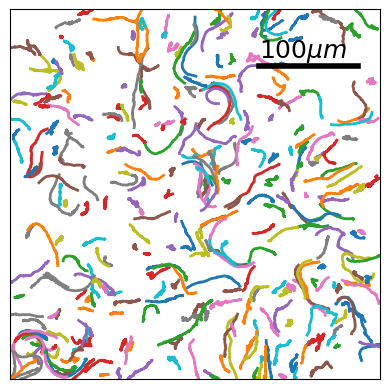

In [4]:
tb.plot_traj_all(traj_loaded, imdim1=tifdim1, imdim2=tifdim2, pix_size=0.1615)

# Calculate the kinematic parameters such as velocity and acceleration etc.

In [9]:
particle_params=tb.calculate_kinematic_parameters(traj_tp, time_step=1)
display(particle_params)

100%|██████████| 357/357 [00:00<00:00, 399.57it/s]


,x,y,frame,major_axis_size,minor_axis_size,body_angle,particle,vx,vy,vel,ax,ay,acc,angle,angular_vel,angular_acc
0,1840.333862,858.746216,0,32.272427,6.306262,53.048576,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1839.520874,859.246155,1,31.828880,6.473937,54.441719,13,-0.812988,0.499939,0.954405,NaN,NaN,NaN,2.590260,NaN,NaN
2,1837.850708,861.069641,2,31.478331,6.143157,54.098339,13,-1.670166,1.823486,2.472763,-0.857178,1.323547,1.576874,2.312337,-0.277923,NaN
3,1836.064209,862.935974,3,33.203121,5.944539,54.068077,13,-1.786499,1.866333,2.583559,-0.116333,0.042847,0.123973,2.334343,0.022005,0.299928
4,1837.799683,862.851807,4,33.616631,6.312464,54.580780,13,1.735474,-0.084167,1.737513,3.521973,-1.950500,4.026008,-0.048460,-2.382803,-2.404808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48830,112.296646,2052.912598,195,25.169781,4.609334,75.796524,1652,1.007965,0.709229,1.232477,4.235161,-1.197998,4.401339,0.613154,-1.994674,-2.017565
48831,112.542496,2052.496582,196,26.809267,5.211643,75.939171,1652,0.245850,-0.416016,0.483230,-0.762115,-1.125244,1.359042,-1.037049,-1.650203,0.344471
48832,109.164726,2053.895752,197,23.478580,4.563632,72.498573,1652,-3.377769,1.399170,3.656091,-3.623619,1.815186,4.052840,2.748880,3.785929,5.436132
48833,104.880051,2055.917969,198,24.162683,4.245761,75.040085,1652,-4.284676,2.022217,4.737912,-0.906906,0.623047,1.100303,2.700624,-0.048257,-3.834186
